In [1]:
import os
import gdown
from src import config

"""
Download from the needed datasets for the project.
"""

if not os.path.exists(config.DATASET_TRAIN):
    gdown.download(config.DATASET_TRAIN_URL, config.DATASET_TRAIN, quiet=False)


Downloading...
From: https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-05.parquet
To: c:\Users\jovv1\Desktop\taxi-price-predictor\dataset\trans_data.parquet
100%|██████████| 55.6M/55.6M [01:29<00:00, 624kB/s]


In [7]:
import pyarrow.parquet as pq
from sklearn import datasets
trips = pq.read_table(config.DATASET_TRAIN)
trips = trips.to_pandas()

In [18]:
trips.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3588290,2,2022-05-31 23:40:19,2022-06-01 00:01:20,NaN,0.00,NaN,None,36,181,0,20.97,0.0,0.5,1.00,0.0,0.3,22.77,NaN,NaN
3588291,2,2022-05-31 23:52:12,2022-06-01 00:06:40,NaN,2.91,NaN,None,144,256,0,11.68,0.0,0.0,2.51,0.0,0.3,16.99,NaN,NaN
3588292,2,2022-05-31 23:27:00,2022-05-31 23:48:00,NaN,3.96,NaN,None,161,145,0,14.54,0.0,0.5,0.00,0.0,0.3,17.84,NaN,NaN
3588293,2,2022-05-31 23:34:12,2022-06-01 00:00:13,NaN,6.27,NaN,None,145,17,0,24.01,0.0,0.5,5.54,0.0,0.3,30.35,NaN,NaN
3588294,2,2022-05-31 23:00:53,2022-05-31 23:07:54,NaN,1.43,NaN,None,238,41,0,10.05,0.0,0.5,2.21,0.0,0.3,15.56,NaN,NaN


In [40]:

# trips['improvement_surcharge'].value_counts()

filtered_trips = trips[trips['tpep_pickup_datetime'].dt.year == 2022]
filtered_trips.sort_values(by=["tpep_pickup_datetime"], inplace=True, ascending=True)
# filtered_trips.tpep_pickup_datetime.head(20)

filtered_trips['improvement_surcharge'].value_counts()

/var/folders/8l/99yl7qnx0kz6v5fgdbr9x4y00000gn/T/ipykernel_48541/1378995678.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trips.sort_values(by=["tpep_pickup_datetime"], inplace=True, ascending=True)


improvement_surcharge
 0.3    3566241
-0.3      20663
 0.0       1376
Name: count, dtype: int64

In [ ]:
# TODO : matriz correlacion
# plot payment type vs value relation

In [8]:
filtered_trips.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [20]:
filtered_trips.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.588295e+06,3588295,3588295,3.458771e+06,3.588295e+06,3.458771e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.458771e+06,3.458771e+06
mean,1.713103e+00,2022-05-16 07:50:29.219312,2022-05-16 08:08:42.275203,1.393923e+00,6.856861e+00,1.365674e+00,1.645738e+02,1.625517e+02,1.183209e+00,1.516813e+01,1.020728e+00,4.891096e-01,2.824744e+00,5.827756e-01,2.964299e-01,2.207840e+01,2.282808e+00,1.008364e-01
min,1.000000e+00,2003-01-01 00:06:06,2003-01-01 00:31:38,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.311500e+03,-4.500000e+00,-5.000000e-01,-1.457000e+02,-5.075000e+01,-3.000000e-01,-1.314800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-05-08 18:14:16.500000,2022-05-08 18:32:36,1.000000e+00,1.150000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-05-16 09:14:42,2022-05-16 09:33:15,1.000000e+00,1.960000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-05-23 18:03:17,2022-05-23 18:21:03.500000,1.000000e+00,3.730000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.460000e+00,0.000000e+00,3.000000e-01,2.376000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-06-01 23:55:30,2022-06-02 00:03:51,9.000000e+00,3.571927e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.966500e+03,8.800000e+00,3.300000e+00,6.650000e+02,8.137500e+02,3.000000e-01,6.970800e+03,2.750000e+00,1.250000e+00
std,4.888093e-01,NaN,NaN,9.555489e-01,6.908488e+02,5.239789e+00,6.562813e+01,7.027926e+01,5.075988e-01,1.489484e+01,1.256724e+00,9.008878e-02,3.368739e+00,2.173699e+00,4.576907e-02,1.848683e+01,7.452415e-01,3.434480e-01


In [21]:
print(filtered_trips.dtypes)

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object


In [22]:
print(filtered_trips.shape)


(3588295, 19)


In [23]:
print(filtered_trips.head(5))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count   
0         1  2022-05-01 00:00:36   2022-05-01 00:19:18              1.0  \
1         1  2022-05-01 00:27:44   2022-05-01 00:41:33              1.0   
2         1  2022-05-01 00:59:00   2022-05-01 01:14:22              1.0   
3         1  2022-05-01 00:48:18   2022-05-01 01:28:02              1.0   
4         1  2022-05-01 00:28:26   2022-05-01 00:37:49              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID   
0            4.1         1.0                  N           246           151  \
1            2.3         1.0                  N           238            74   
2            4.2         1.0                  N           163           260   
3            0.0         1.0                  N            79           182   
4            1.6         1.0                  N           238            75   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount   


In [24]:
import matplotlib.pyplot as plt

def plot_values(data,title, xlabel, ylabel):
  value_counts = data.value_counts()
  value_counts.plot(kind='bar')

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

VendorID
2    2527997
1    1054130
6       6154
5         14
Name: count, dtype: int64


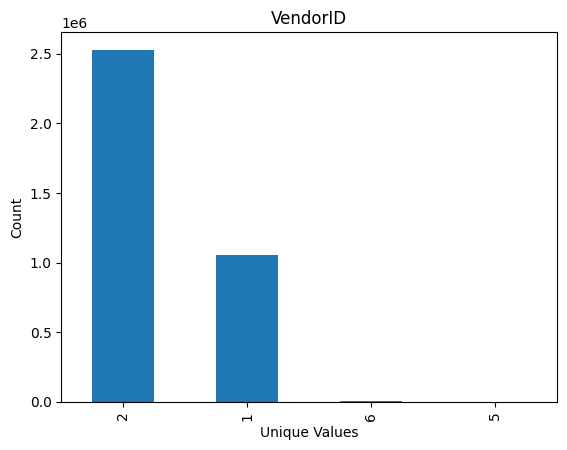

In [25]:
# Count the occurrences of each unique value in the column
value_counts = filtered_trips['VendorID'].value_counts()
print(value_counts)

plot_values(filtered_trips['VendorID'], 'VendorID', 'Unique Values', 'Count')


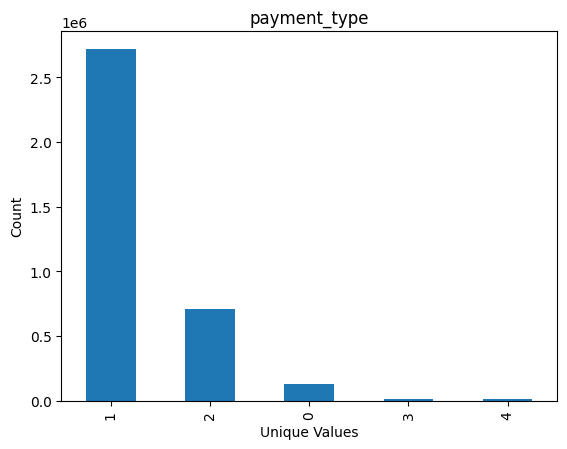

In [13]:
plot_values(filtered_trips['payment_type'], 'payment_type', 'Unique Values', 'Count')


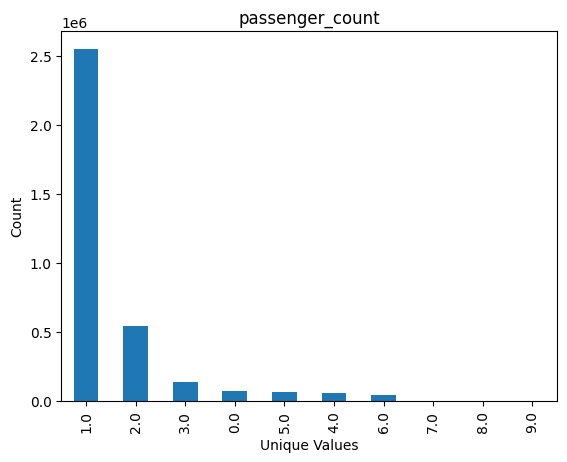

In [26]:
plot_values(filtered_trips['passenger_count'], 'passenger_count', 'Unique Values', 'Count')

## There are trips with 0 passegers? check this

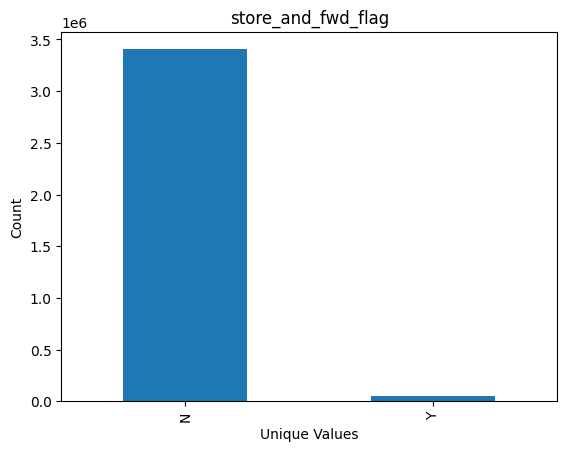

In [27]:
plot_values(filtered_trips['store_and_fwd_flag'], 'store_and_fwd_flag', 'Unique Values', 'Count')


In [28]:
filtered_trips.isnull().sum().sort_index()/len(trips)


DOLocationID             0.000000
PULocationID             0.000000
RatecodeID               0.036096
VendorID                 0.000000
airport_fee              0.036096
congestion_surcharge     0.036096
extra                    0.000000
fare_amount              0.000000
improvement_surcharge    0.000000
mta_tax                  0.000000
passenger_count          0.036096
payment_type             0.000000
store_and_fwd_flag       0.036096
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
trip_distance            0.000000
dtype: float64

0          17.00
1          11.00
2          15.50
3          41.20
4           7.50
           ...  
3588290    20.97
3588291    11.68
3588292    14.54
3588293    24.01
3588294    10.05
Name: fare_amount, Length: 3588295, dtype: float64


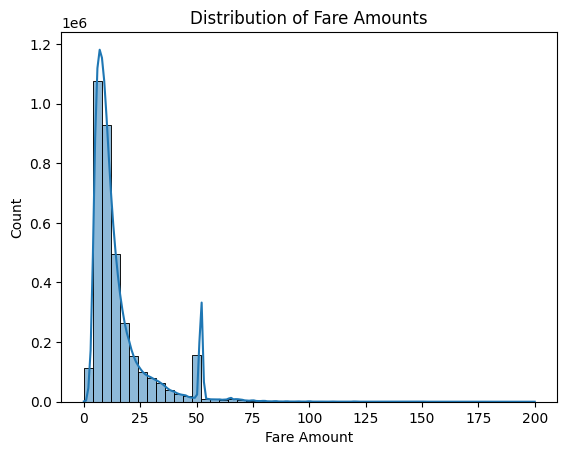

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_trips = trips[(trips['fare_amount']>0) & (trips['fare_amount']<200)]

sns.histplot(filtered_trips['fare_amount'], bins=50, kde=True)
plt.xlabel('Fare Amount')
plt.ylabel('Count')
plt.title('Distribution of Fare Amounts')
plt.show()

trip_distance
1.00     49609
1.10     48850
0.90     48642
1.20     48099
1.30     46862
         ...  
24.83        5
23.81        5
24.43        4
24.68        4
24.51        4
Name: count, Length: 2499, dtype: int64


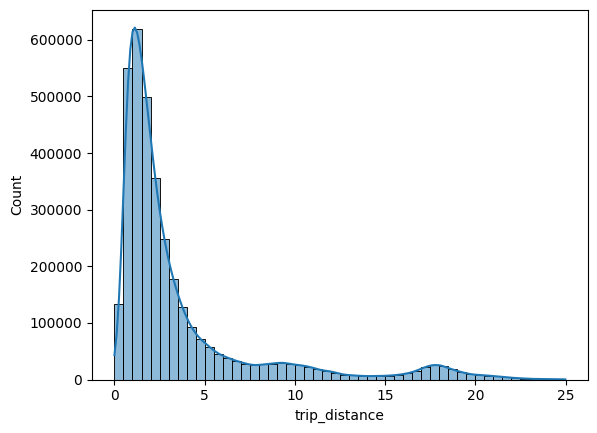

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_trips = filtered_trips[(filtered_trips['trip_distance']>0) & (filtered_trips['trip_distance']<25)]

print(filtered_trips['trip_distance'].value_counts())
sns.histplot(filtered_trips['trip_distance'],bins=50, kde=True)
plt.show()